In [1]:
x=1

In [11]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

# Some plotting aesthetics
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.dpi'] = 100

In [2]:
hlca = sc.read('../../../../snakemake/hlca/5fold/hlca_hyperparam/data/pp/hlca_hvg_pearson.h5ad')
hlca

AnnData object with n_obs × n_vars = 2149684 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_l

In [3]:
sc.pp.normalize_total(hlca, target_sum=1e4)

In [4]:
sc.pp.log1p(hlca)

In [5]:
hlca.var_names

Index(['ENSG00000175899', 'ENSG00000179869', 'ENSG00000167972',
       'ENSG00000154262', 'ENSG00000141338', 'ENSG00000085563',
       'ENSG00000006071', 'ENSG00000154175', 'ENSG00000099204',
       'ENSG00000072818',
       ...
       'ENSG00000283056', 'ENSG00000004838', 'ENSG00000130844',
       'ENSG00000151789', 'ENSG00000176083', 'ENSG00000174255',
       'ENSG00000124203', 'ENSG00000187498', 'ENSG00000157554',
       'ENSG00000159167'],
      dtype='object', name='ensembl_id', length=2000)

In [6]:
macrophages_genes = {
    'SPP1': 'ENSG00000118785',
    'LIPA': 'ENSG00000107798',
    'LPL': 'ENSG00000175445',
    'FDX1': 'ENSG00000137714',
    'SPARC': 'ENSG00000113140',
    'MATK': 'ENSG00000007264',
    'GPC4': 'ENSG00000076716',
    'PALLD': 'ENSG00000129116',
    'MMP7': 'ENSG00000137673',
    'MMP9': 'ENSG00000100985',
    'CHIT1': 'ENSG00000133063',
    'CSTK': 'ENSG00000143387',
    'CHI3L1': 'ENSG00000133048',
    'CSF1': 'ENSG00000184371',
    'FCMR': 'ENSG00000162894',
    'TIMP3': 'ENSG00000100234',
    'COL22A1': 'ENSG00000169436',
    'SIGLEC15': 'ENSG00000197046',
    'CCL2': 'ENSG00000108691',
}

In [7]:
adata = sc.read('../../../pipeline/data/multigrate_mil/hlca_healthy_ipf_embed_balanced/b2e8c62cf5_adata_both.h5ad')
adata

AnnData object with n_obs × n_vars = 450214 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [8]:
adata.obs['cell_attn'] = np.mean(adata.obs[['cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4']], axis=1)

In [9]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

KeyboardInterrupt: 

In [ ]:
macrophages = hlca[adata[adata.obs['transf_ann_level_3_label'] == 'Macrophages'].obs_names].copy()
macrophages.obs['cell_attn'] = adata[adata.obs['transf_ann_level_3_label'] == 'Macrophages'].obs['cell_attn']
macrophages

In [ ]:
sc.tl.score_genes(macrophages, gene_list=list(macrophages_genes.values()), score_name='profibrotic_score')

In [ ]:
adata.obs['profibrotic_score'] = np.nan
adata.obs.loc[adata.obs['transf_ann_level_3_label'] == 'Macrophages', 'profibrotic_score'] = macrophages.obs['profibrotic_score']

In [12]:
adata = sc.read('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/adata.h5ad')
adata

AnnData object with n_obs × n_vars = 450214 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [23]:
cmap = matplotlib.colormaps['coolwarm']

rgba = cmap(0.9)
print(matplotlib.colors.rgb2hex(rgba))

#d65244


In [24]:
adata.uns['lung_condition_coarse_colors'] = ['#5977e3', '#d65244']

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


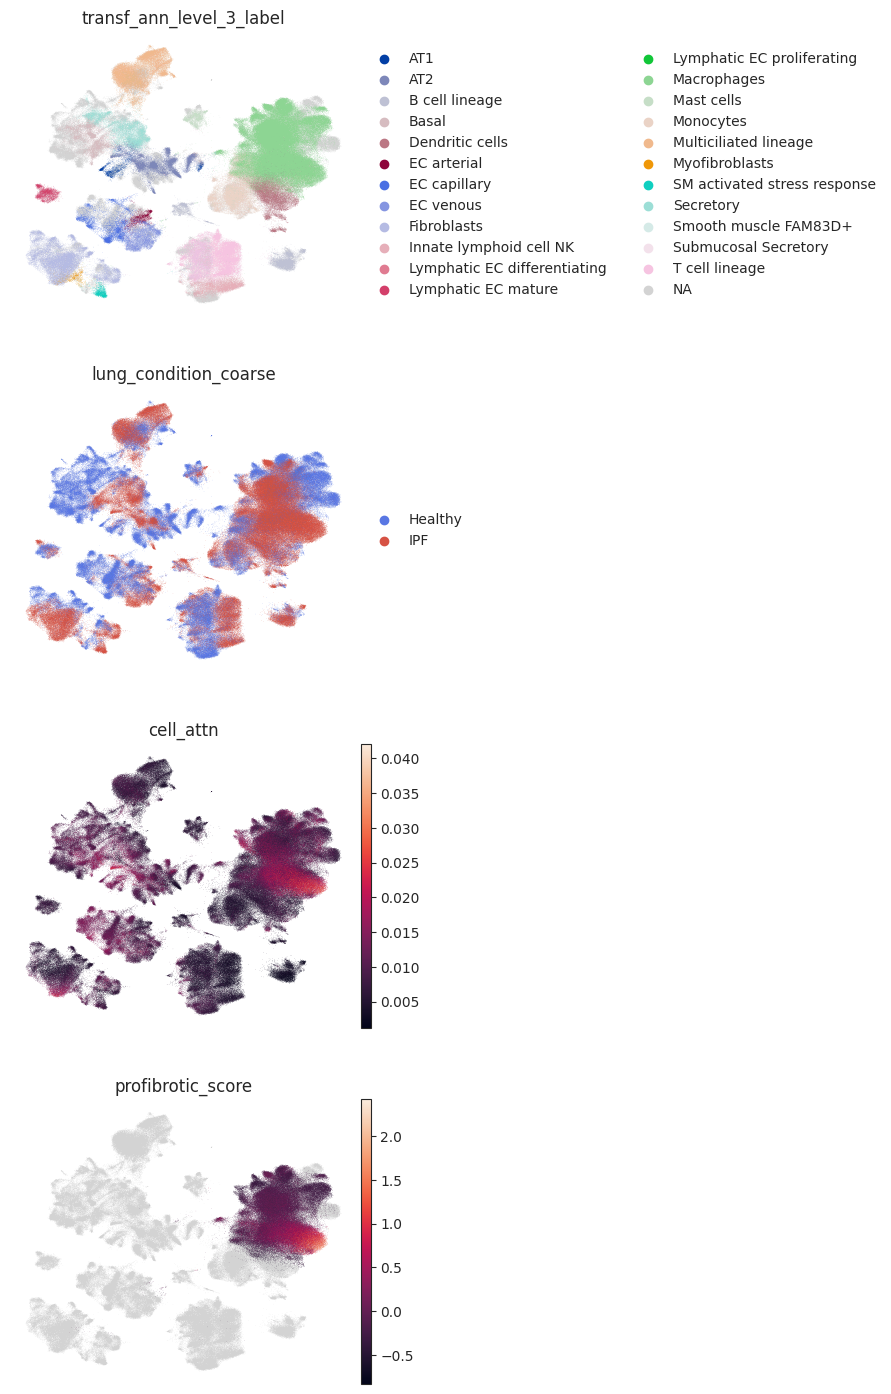

In [25]:
sc.pl.umap(
    adata,
    color=['transf_ann_level_3_label', 'lung_condition_coarse', 'cell_attn', 'profibrotic_score'],
    ncols=1,
    frameon=False
)

all macrophages

In [29]:
pearson_corr = np.corrcoef(macrophages.obs['cell_attn'].values, macrophages.obs['profibrotic_score'].values)
pearson_corr[0, 1]

0.49591593380690724

Text(0.5, 1.0, 'Pearson correlation = 0.50')

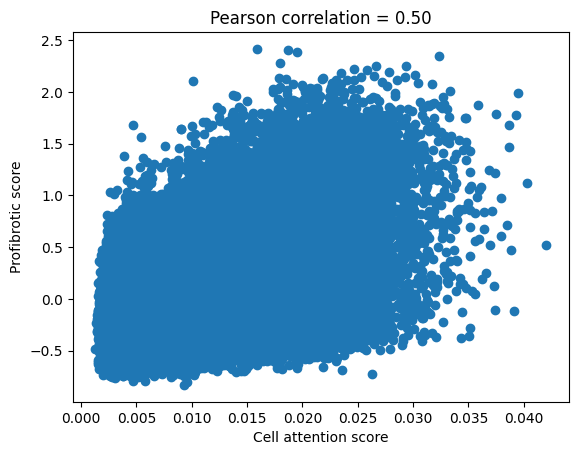

In [33]:
plt.scatter(macrophages.obs['cell_attn'], macrophages.obs['profibrotic_score'])
plt.xlabel('Cell attention score')
plt.ylabel('Profibrotic score')
plt.title(f'Pearson correlation = {pearson_corr[0, 1]:.2f}')

ipf macrophages

In [49]:
ipf_macrophages = macrophages[macrophages.obs['lung_condition_coarse'] == 'IPF'].copy()
ipf_macrophages

AnnData object with n_obs × n_vars = 104045 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_le

In [50]:
pearson_corr = np.corrcoef(ipf_macrophages.obs['cell_attn'].values, ipf_macrophages.obs['profibrotic_score'].values)
pearson_corr[0, 1]

0.5285065734372915

Text(0.5, 1.0, 'Pearson correlation = 0.53')

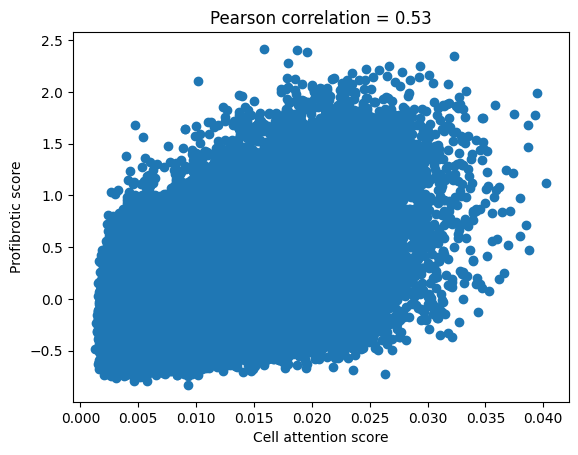

In [51]:
plt.scatter(ipf_macrophages.obs['cell_attn'], ipf_macrophages.obs['profibrotic_score'])
plt.xlabel('Cell attention score')
plt.ylabel('Profibrotic score')
plt.title(f'Pearson correlation = {pearson_corr[0, 1]:.2f}')

In [35]:
macrophages.obsm['latent'] = adata[macrophages.obs_names].X.copy()
macrophages

AnnData object with n_obs × n_vars = 138736 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_le

In [36]:
macrophages.obsm['latent'].shape

(138736, 30)

In [39]:
sc.pp.neighbors(macrophages, use_rep='latent')

In [40]:
sc.tl.leiden(macrophages)

In [41]:
sc.tl.umap(macrophages)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


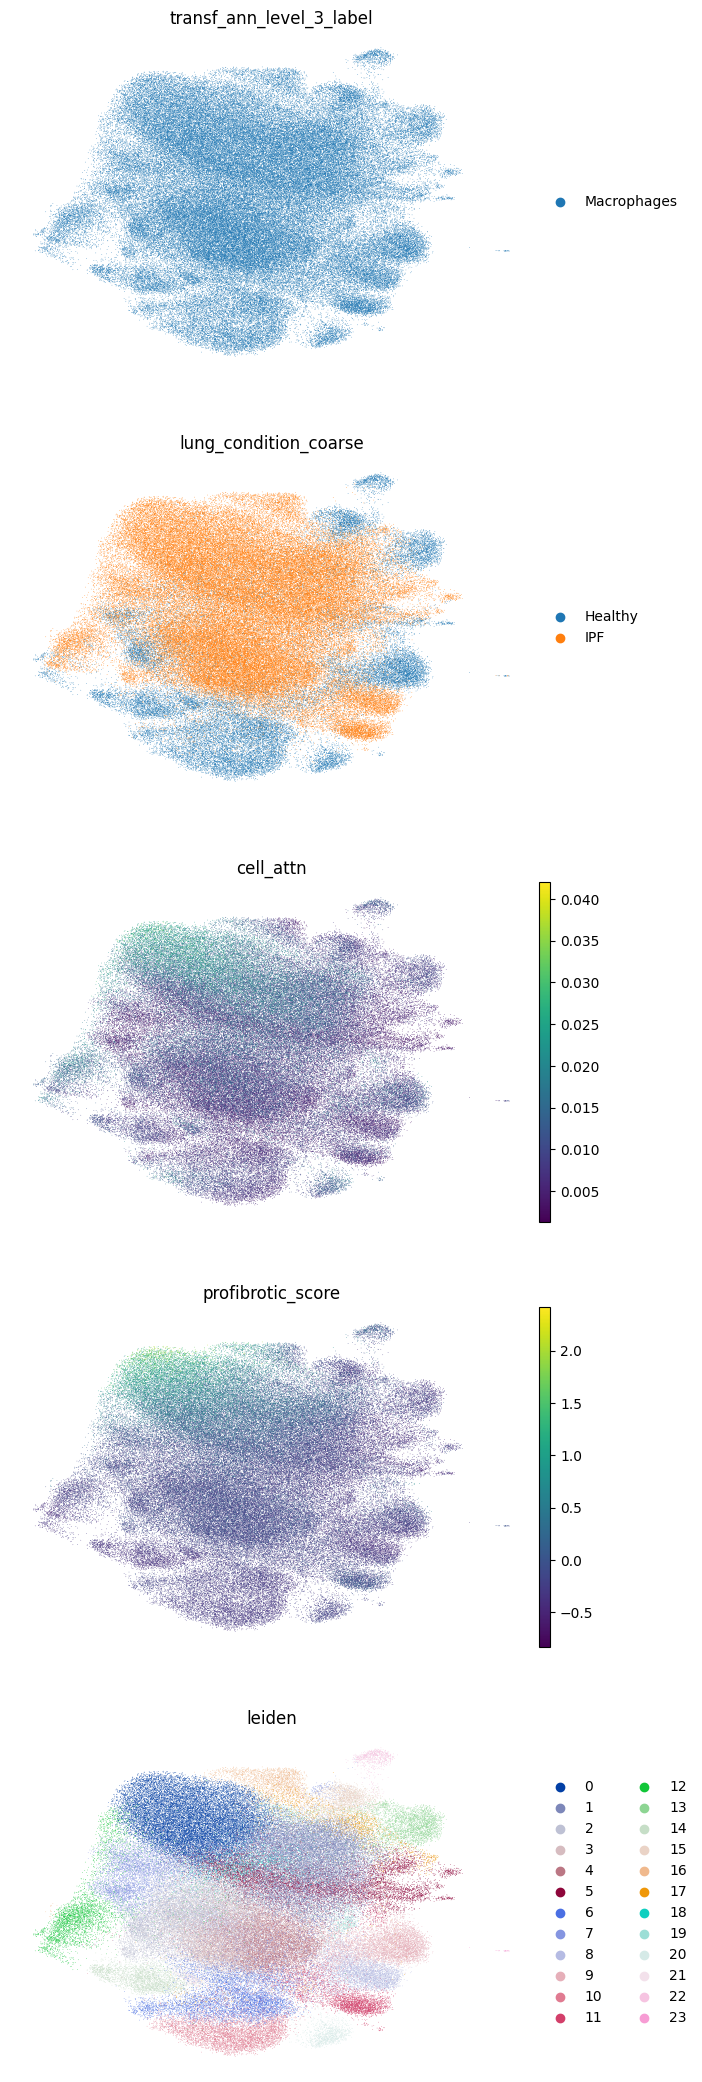

In [45]:
sc.pl.umap(
    macrophages, 
    color=['transf_ann_level_3_label', 'lung_condition_coarse', 'cell_attn', 'profibrotic_score', 'leiden'],
    ncols=1,
    frameon=False,
)

In [43]:
df = macrophages.obs[['cell_attn', 'profibrotic_score', 'leiden']]
df

,cell_attn,profibrotic_score,leiden
CATCCACCACCGGAAA-WSSS8015045-0_meyer_unpubl,0.011796,0.201422,9
098C-b_CACAGTACACGCATCG_adams,0.007280,-0.146224,4
166I-a_GGGATGAAGTGACTCT_adams,0.002866,-0.377719,5
226C-a_CGGACACGTAGCGCAA_adams,0.004541,-0.466437,13
SC19_GGTGAAGAGCTAAGAT_reyfman_disease,0.011090,0.598511,16
...,...,...,...
228I-b_CGGACACTCAGGCAAG_adams,0.014954,-0.121669,1
135I-b_CTAACTTTCTCAACTT_adams,0.008959,-0.212865,3
CACGAATAGTTACTCG-1_10-PX10-sub_mould,0.010676,-0.340144,14
F00431_GTCACAACAGTCCTTC_haberman,0.004334,-0.453286,5


<Axes: xlabel='leiden'>

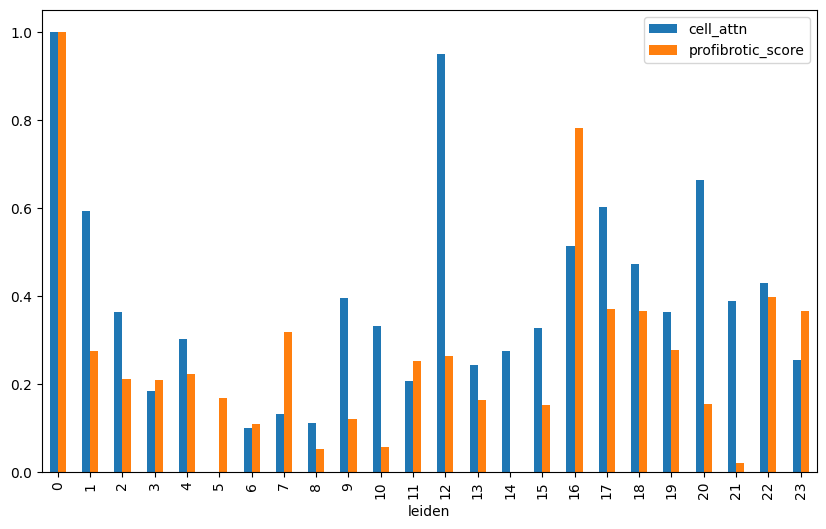

In [48]:
df_groups = df.groupby(['leiden']).agg('mean')
# min-max normalize
df_groups = (df_groups-df_groups.min())/(df_groups.max()-df_groups.min())

#create bar plot with custom aesthetics
df_groups.plot(kind='bar', figsize=(10, 6))

In [26]:
macrophages = sc.read('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/macrophages.h5ad')
macrophages

AnnData object with n_obs × n_vars = 138736 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_le

In [27]:
ipf_macrophages = macrophages[macrophages.obs['lung_condition_coarse'] == 'IPF'].copy()
ipf_macrophages

AnnData object with n_obs × n_vars = 104045 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_le

In [28]:
threshold_idx = int(len(ipf_macrophages) * 0.9)
threshold_value = sorted(ipf_macrophages.obs['cell_attn'])[threshold_idx]
threshold_value

0.018071629106998444

In [29]:
ipf_macrophages_top = ipf_macrophages[ipf_macrophages.obs['cell_attn'] >= threshold_value]
ipf_macrophages_top

View of AnnData object with n_obs × n_vars = 10405 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf

In [30]:
df1 = ipf_macrophages_top.obs[['profibrotic_score']]
df1.loc[:, 'group'] = 'top 10% cells'
df2 = ipf_macrophages.obs[['profibrotic_score']]
df2.loc[:, 'group'] = 'all cells'
df = pd.concat([df1, df2])
df

/tmp/ipykernel_2967565/2470000384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'group'] = 'top 10% cells'
/tmp/ipykernel_2967565/2470000384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'group'] = 'all cells'


,profibrotic_score,group
210CO_TCGGGACGTTTAAGCC_adams,0.452990,top 10% cells
135I-a_GACCTGGTCTTTAGTC_adams,0.214100,top 10% cells
177I_GGTATTGTCTATCCTA_adams,1.802665,top 10% cells
ILD63_CCGTTCATCATCGCTC_haberman,0.076000,top 10% cells
222I-a_CATCAGAAGGACAGCT_adams,1.760590,top 10% cells
...,...,...
ILD61-2_TAAGTGCAGGACATTA_haberman,1.018897,all cells
228I-b_CGGACACTCAGGCAAG_adams,-0.121669,all cells
135I-b_CTAACTTTCTCAACTT_adams,-0.212865,all cells
F00431_GTCACAACAGTCCTTC_haberman,-0.453286,all cells


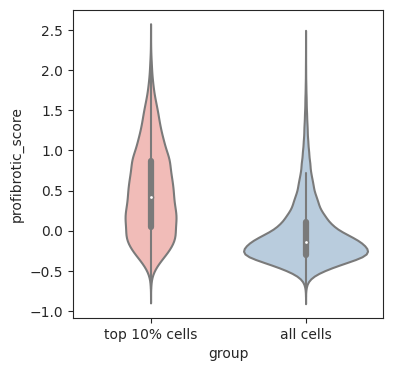

In [31]:
sns.violinplot(x="group", y="profibrotic_score", data=df, palette="Pastel1")
plt.show()

In [60]:
from scipy.stats import ttest_ind

In [74]:
ttestresult = ttest_ind(df1['profibrotic_score'], df2['profibrotic_score'])

In [75]:
ttestresult.pvalue

0.0

In [77]:
macrophages.obsm['genes'] = macrophages.X.copy()
macrophages

AnnData object with n_obs × n_vars = 138736 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_le

In [79]:
adata.write('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/adata.h5ad')

In [80]:
macrophages.write('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/macrophages.h5ad')

calculate profibrotic score on weighted gene expression, i.e. multiply gene expression by the attention score for each cell

In [98]:
macrophages.X = macrophages.X.A * np.array(macrophages.obs['cell_attn']).reshape(-1, 1)

In [99]:
sc.tl.score_genes(macrophages, gene_list=list(macrophages_genes.values()), score_name='profibrotic_score_weighted')

In [101]:
ipf_macrophages = macrophages[macrophages.obs['lung_condition_coarse'] == 'IPF'].copy()
ipf_macrophages

AnnData object with n_obs × n_vars = 104045 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_le

In [104]:
df3 = ipf_macrophages.obs[['profibrotic_score_weighted']]
df3 = df3.rename(columns={'profibrotic_score_weighted': 'profibrotic_score'})
df3.loc[:, 'group'] = 'all cells weighted'
df = pd.concat([df1, df2, df3])
df

,profibrotic_score,group
210CO_TCGGGACGTTTAAGCC_adams,0.452990,top 10% cells
135I-a_GACCTGGTCTTTAGTC_adams,0.214100,top 10% cells
177I_GGTATTGTCTATCCTA_adams,1.802665,top 10% cells
ILD63_CCGTTCATCATCGCTC_haberman,0.076000,top 10% cells
222I-a_CATCAGAAGGACAGCT_adams,1.760590,top 10% cells
...,...,...
ILD61-2_TAAGTGCAGGACATTA_haberman,0.010277,all cells weighted
228I-b_CGGACACTCAGGCAAG_adams,-0.002470,all cells weighted
135I-b_CTAACTTTCTCAACTT_adams,-0.003146,all cells weighted
F00431_GTCACAACAGTCCTTC_haberman,-0.002820,all cells weighted


doesn't work, as ranges of values are different

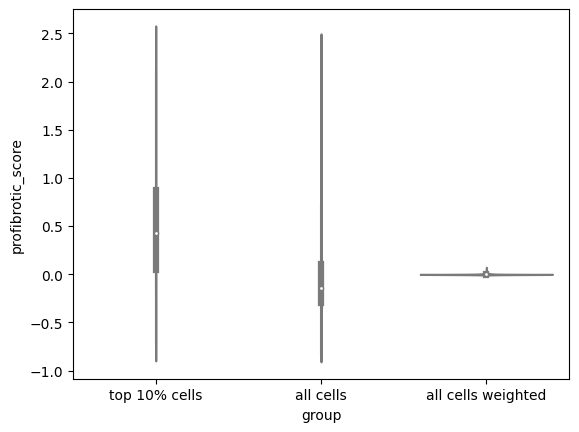

In [105]:
sns.violinplot(x="group", y="profibrotic_score", data=df, palette="Pastel1")
plt.show()

compositional changes

In [32]:
adata = sc.read('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/adata.h5ad')
adata

AnnData object with n_obs × n_vars = 450214 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [33]:
ipf = adata[adata.obs['lung_condition_coarse'] == 'IPF'].copy()
ipf

AnnData object with n_obs × n_vars = 239952 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [34]:
threshold_idx = int(len(ipf) * 0.9)
threshold_value = sorted(ipf.obs['cell_attn'])[threshold_idx]
threshold_value

0.015133966691792011

In [35]:
ipf_top = ipf[ipf.obs['cell_attn'] >= threshold_value]
ipf_top

View of AnnData object with n_obs × n_vars = 23996 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_a

In [36]:
df1 = ipf_top.obs[['transf_ann_level_3_label']]
df1.loc[:, 'group'] = 'top 10% cells'
df2 = ipf.obs[['transf_ann_level_3_label']]
df2.loc[:, 'group'] = 'all cells'
df = pd.concat([df1, df2])
df

/tmp/ipykernel_2967565/821501471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'group'] = 'top 10% cells'
/tmp/ipykernel_2967565/821501471.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'group'] = 'all cells'


,transf_ann_level_3_label,group
ILD59-2_CCATTCGCAATGGATA_haberman,AT2,top 10% cells
SC09_AACGTTGAGTCTCAAC_reyfman_disease,Macrophages,top 10% cells
157I-b_ATAGACCCAATGTAAG_adams,Macrophages,top 10% cells
ACTGCTCGTAAGGATT_IPF1_tsukui,Fibroblasts,top 10% cells
210CO_TCGGGACGTTTAAGCC_adams,Macrophages,top 10% cells
...,...,...
ILD60-1_CCGGTAGAGCACAGGT_haberman,Dendritic cells,all cells
ILD59-2_TTGGCAAGTTCCCTTG_haberman,AT2,all cells
F00431_GTCACAACAGTCCTTC_haberman,Macrophages,all cells
SC08_TTGACTTGTTCCACGG_reyfman_disease,B cell lineage,all cells


In [37]:
df_sort = df.loc[df['group'] == 'all cells', 'transf_ann_level_3_label'].value_counts().sort_values(ascending=False)
df_sort

transf_ann_level_3_label
Macrophages                     104045
Multiciliated lineage            21351
Fibroblasts                      19581
T cell lineage                   17701
Monocytes                        14840
Dendritic cells                  13262
AT2                               8419
Secretory                         8301
B cell lineage                    7636
EC venous                         6082
Innate lymphoid cell NK           5067
Basal                             3876
EC capillary                      2309
SM activated stress response      1728
Lymphatic EC mature               1327
EC arterial                       1230
Mast cells                        1210
Myofibroblasts                     910
AT1                                758
Smooth muscle FAM83D+              144
Lymphatic EC differentiating       136
Submucosal Secretory                38
Lymphatic EC proliferating           1
Name: count, dtype: int64

In [38]:
df_group = df.groupby('group').value_counts(normalize=True).mul(100)
df_group

group          transf_ann_level_3_label    
all cells      Macrophages                     43.360755
               Multiciliated lineage            8.898030
               Fibroblasts                      8.160382
               T cell lineage                   7.376892
               Monocytes                        6.184570
               Dendritic cells                  5.526939
               AT2                              3.508618
               Secretory                        3.459442
               B cell lineage                   3.182303
               EC venous                        2.534674
               Innate lymphoid cell NK          2.111672
               Basal                            1.615323
               EC capillary                     0.962276
               SM activated stress response     0.720144
               Lymphatic EC mature              0.553027
               EC arterial                      0.512603
               Mast cells                   

In [39]:
len(list(df_sort.index))

23

In [40]:
len(list(adata.obs['transf_ann_level_3_label'].cat.categories))

23

In [41]:
color = []
for ct in df_sort.index:
    idx = list(adata.obs['transf_ann_level_3_label'].cat.categories).index(ct)
    color.append(ipf.uns['transf_ann_level_3_label_colors'][idx])
len(color)

23

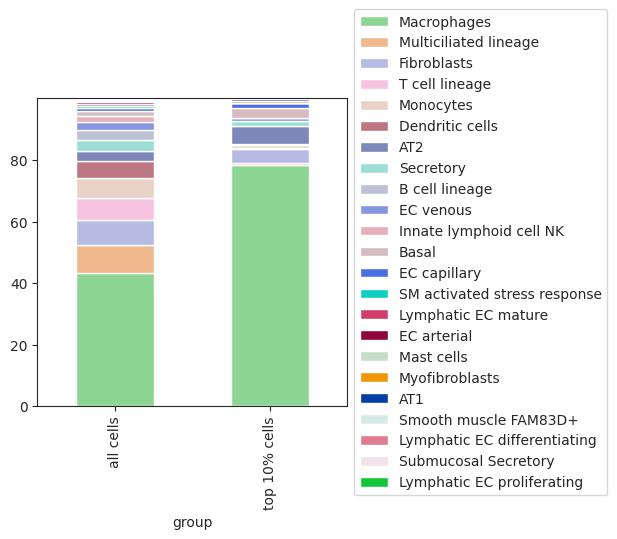

In [42]:
df_group.reindex(index=df_sort.index, level=1).unstack().plot.bar(stacked=True, color=color).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='group'>

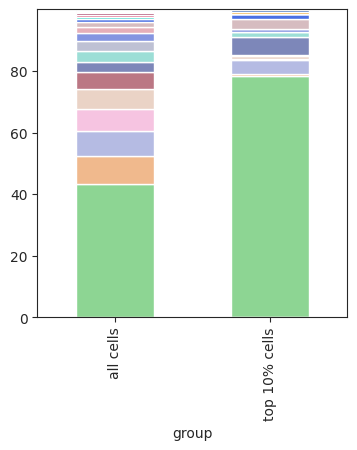

In [46]:
df_group.reindex(index=df_sort.index, level=1).unstack().plot.bar(stacked=True, color=color, legend=False)

Text(0, 0.5, 'Percentage')

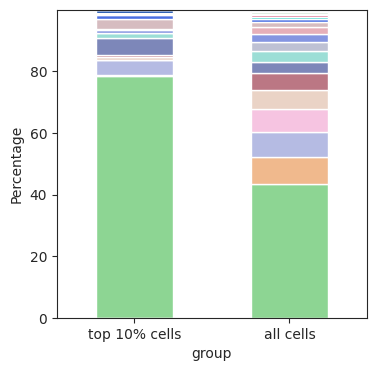

In [53]:
df_group.reindex(index=df_sort.index, level=1).unstack().iloc[[1, 0], :].plot.bar(stacked=True, color=color, legend=False, rot=0)
plt.ylabel('Percentage')